## Tutorial : Running minimal inference examples with diffuser.

For this tutorial, we will use my pre-trained lora embedding that is pretrained on pop-arts, illustrations and pixar footages.

To get started install this package with:

```bash
pip install git+https://github.com/cloneofsimo/lora.git
```


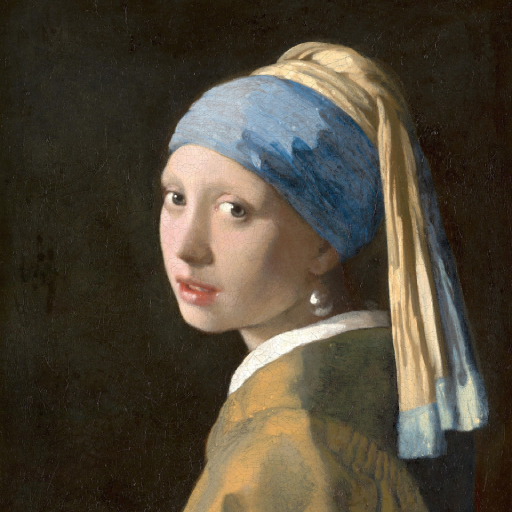

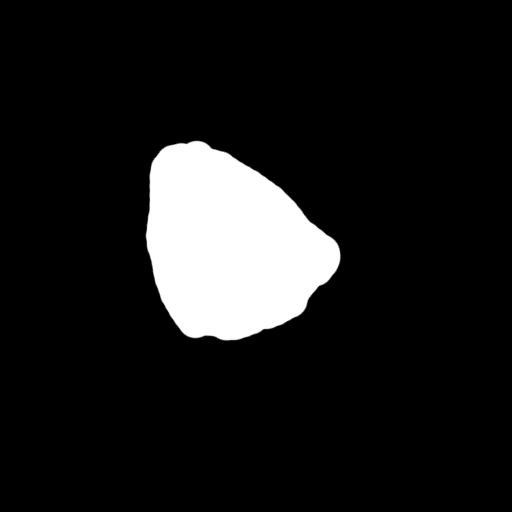

In [47]:
from PIL import Image


base_image = Image.open("../contents/inpainting_base_image.png")
mask_image = Image.open("../contents/inpainting_mask.png")

base_image.show()
mask_image.show()

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

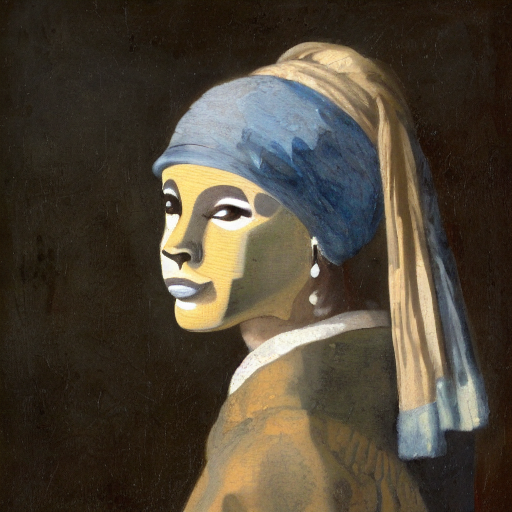

In [48]:
from diffusers import StableDiffusionInpaintPipeline, EulerAncestralDiscreteScheduler
import torch

model_id = "runwayml/stable-diffusion-inpainting"

pipe = StableDiffusionInpaintPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda"
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

# Disable safety filter
def dummy_checker(images, **kwargs): return images, False
pipe.safety_checker = dummy_checker


prompt = "baby lion in style of <s1><s2>"
torch.manual_seed(0)
image = pipe(prompt=prompt, image=base_image, mask_image=mask_image, num_inference_steps=50, guidance_scale=7).images[0]

image  # nice. diffusers are cool.


<s1>
<s2>


  0%|          | 0/50 [00:00<?, ?it/s]

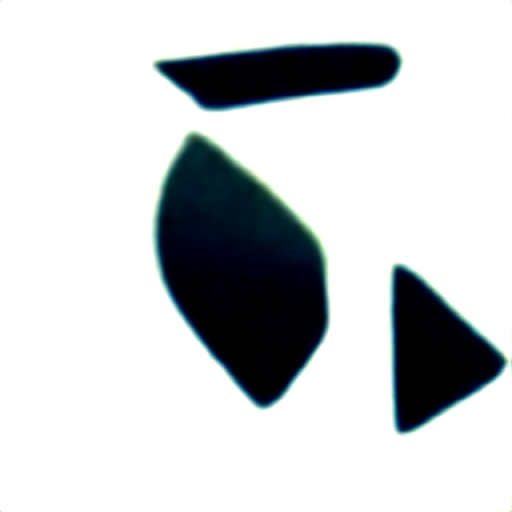

In [49]:
patch_pipe(
    pipe,
    "../example_loras/lora_disney_inpainting.safetensors",
    patch_text=True,
    patch_ti=True,
    patch_unet=True,
)
torch.manual_seed(0)
tune_lora_scale(pipe.unet, 1.0)
tune_lora_scale(pipe.text_encoder, 1.0)
image = pipe(prompt=prompt, image=base_image, mask_image=mask_image, num_inference_steps=50, guidance_scale=5).images[0]
image.save("../contents/disney_lora_inpainting.jpg")
image


  0%|          | 0/50 [00:00<?, ?it/s]

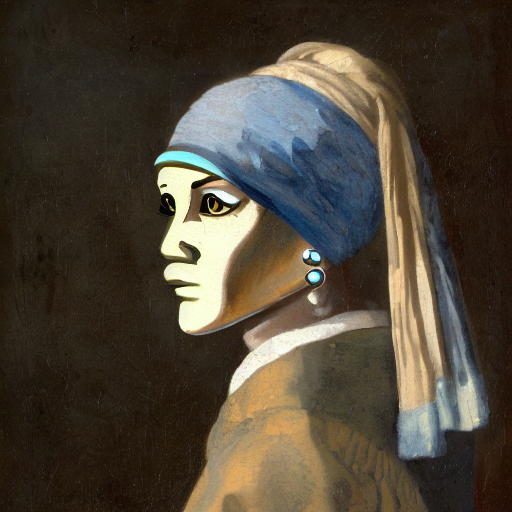

In [50]:
torch.manual_seed(6)
tune_lora_scale(pipe.unet, 0.5)
tune_lora_scale(pipe.text_encoder, 0.5)
image = pipe(prompt=prompt, image=base_image, mask_image=mask_image, num_inference_steps=50, guidance_scale=5).images[0]
image.save("../contents/disney_lora_inpainting.jpg")
image


In [51]:

patch_pipe(
    pipe,
    "../example_loras/lora_krk_inpainting.safetensors",
    patch_text=True,
    patch_ti=True,
    patch_unet=True,
)

example_prompts = [
    "painting of <TOK>, a starry night, style of vincent van gogh",
    "portrait of <TOK> by mario testino 1950, 1950s style, hair tied in a bun, taken in 1950, detailed face of <TOK>, sony a7r",
    "photof of <TOK>, 50mm, sharp, muscular, detailed realistic face, hyper realistic, perfect face, intricate, natural light, <TOK> underwater photoshoot,collarbones, skin indentation, Alphonse Mucha, Greg Rutkowski",
    "a photo of <TOK> in advanced organic armor, biological filigree, detailed symmetric face, flowing hair, neon details, intricate, elegant, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, octane, art by Krenz Cushart , Artem Demura, Alphonse Mucha, digital cgi art 8K HDR by Yuanyuan Wang photorealistic",
    "a photo of <TOK> on the beach, small waves, detailed symmetric face, beautiful composition",
    "a photo of <TOK> rainbow background, wlop, dan mumford, artgerm, liam brazier, peter mohrbacher, jia zhangke, 8 k, raw, featured in artstation, octane render, cinematic, elegant, intricate, 8 k",
    "photo of Summoner <TOK> with a cute water elemental, fantasy illustration, detailed face, intricate, elegant, highly detailed, digital painting, artstation, concept art, wallpaper, smooth, sharp focus, illustration, art by artgerm and greg rutkowski",
    "<TOK>, cyberpunk 2077, 4K, 3d render in unreal engine",
    "a pencil sketch of <TOK>",
    "a minecraft render of <TOK>",
    "young woman <TOK>, eden, intense eyes, tears running down, crying, vaporwave aesthetic, synthwave, colorful, psychedelic, crown, long gown, flowers, bees, butterflies, ribbons, ornate, intricate, digital painting, artstation, concept art, smooth, sharp focus, illustration of <wday>, art by artgerm and greg rutkowski and alphonse mucha",
    "<TOK> in a construction outfit",
]

outs = []
tune_lora_scale(pipe.unet, 0.5)
tune_lora_scale(pipe.text_encoder, 0.5)
for idx, prompt in enumerate(example_prompts):
    prompt = prompt.replace("<TOK>", "<s1><s2>")
    torch.manual_seed(idx)
    image = pipe(prompt=prompt, image=base_image, mask_image=mask_image, num_inference_steps=50, guidance_scale=6).images[0]
    outs.append(image)


<s1>
The tokenizer already contains the token <s1>.
Replacing <s1> embedding.
<s2>
The tokenizer already contains the token <s2>.
Replacing <s2> embedding.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (81 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['uan wang photorealistic']


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['alphonse mucha']


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

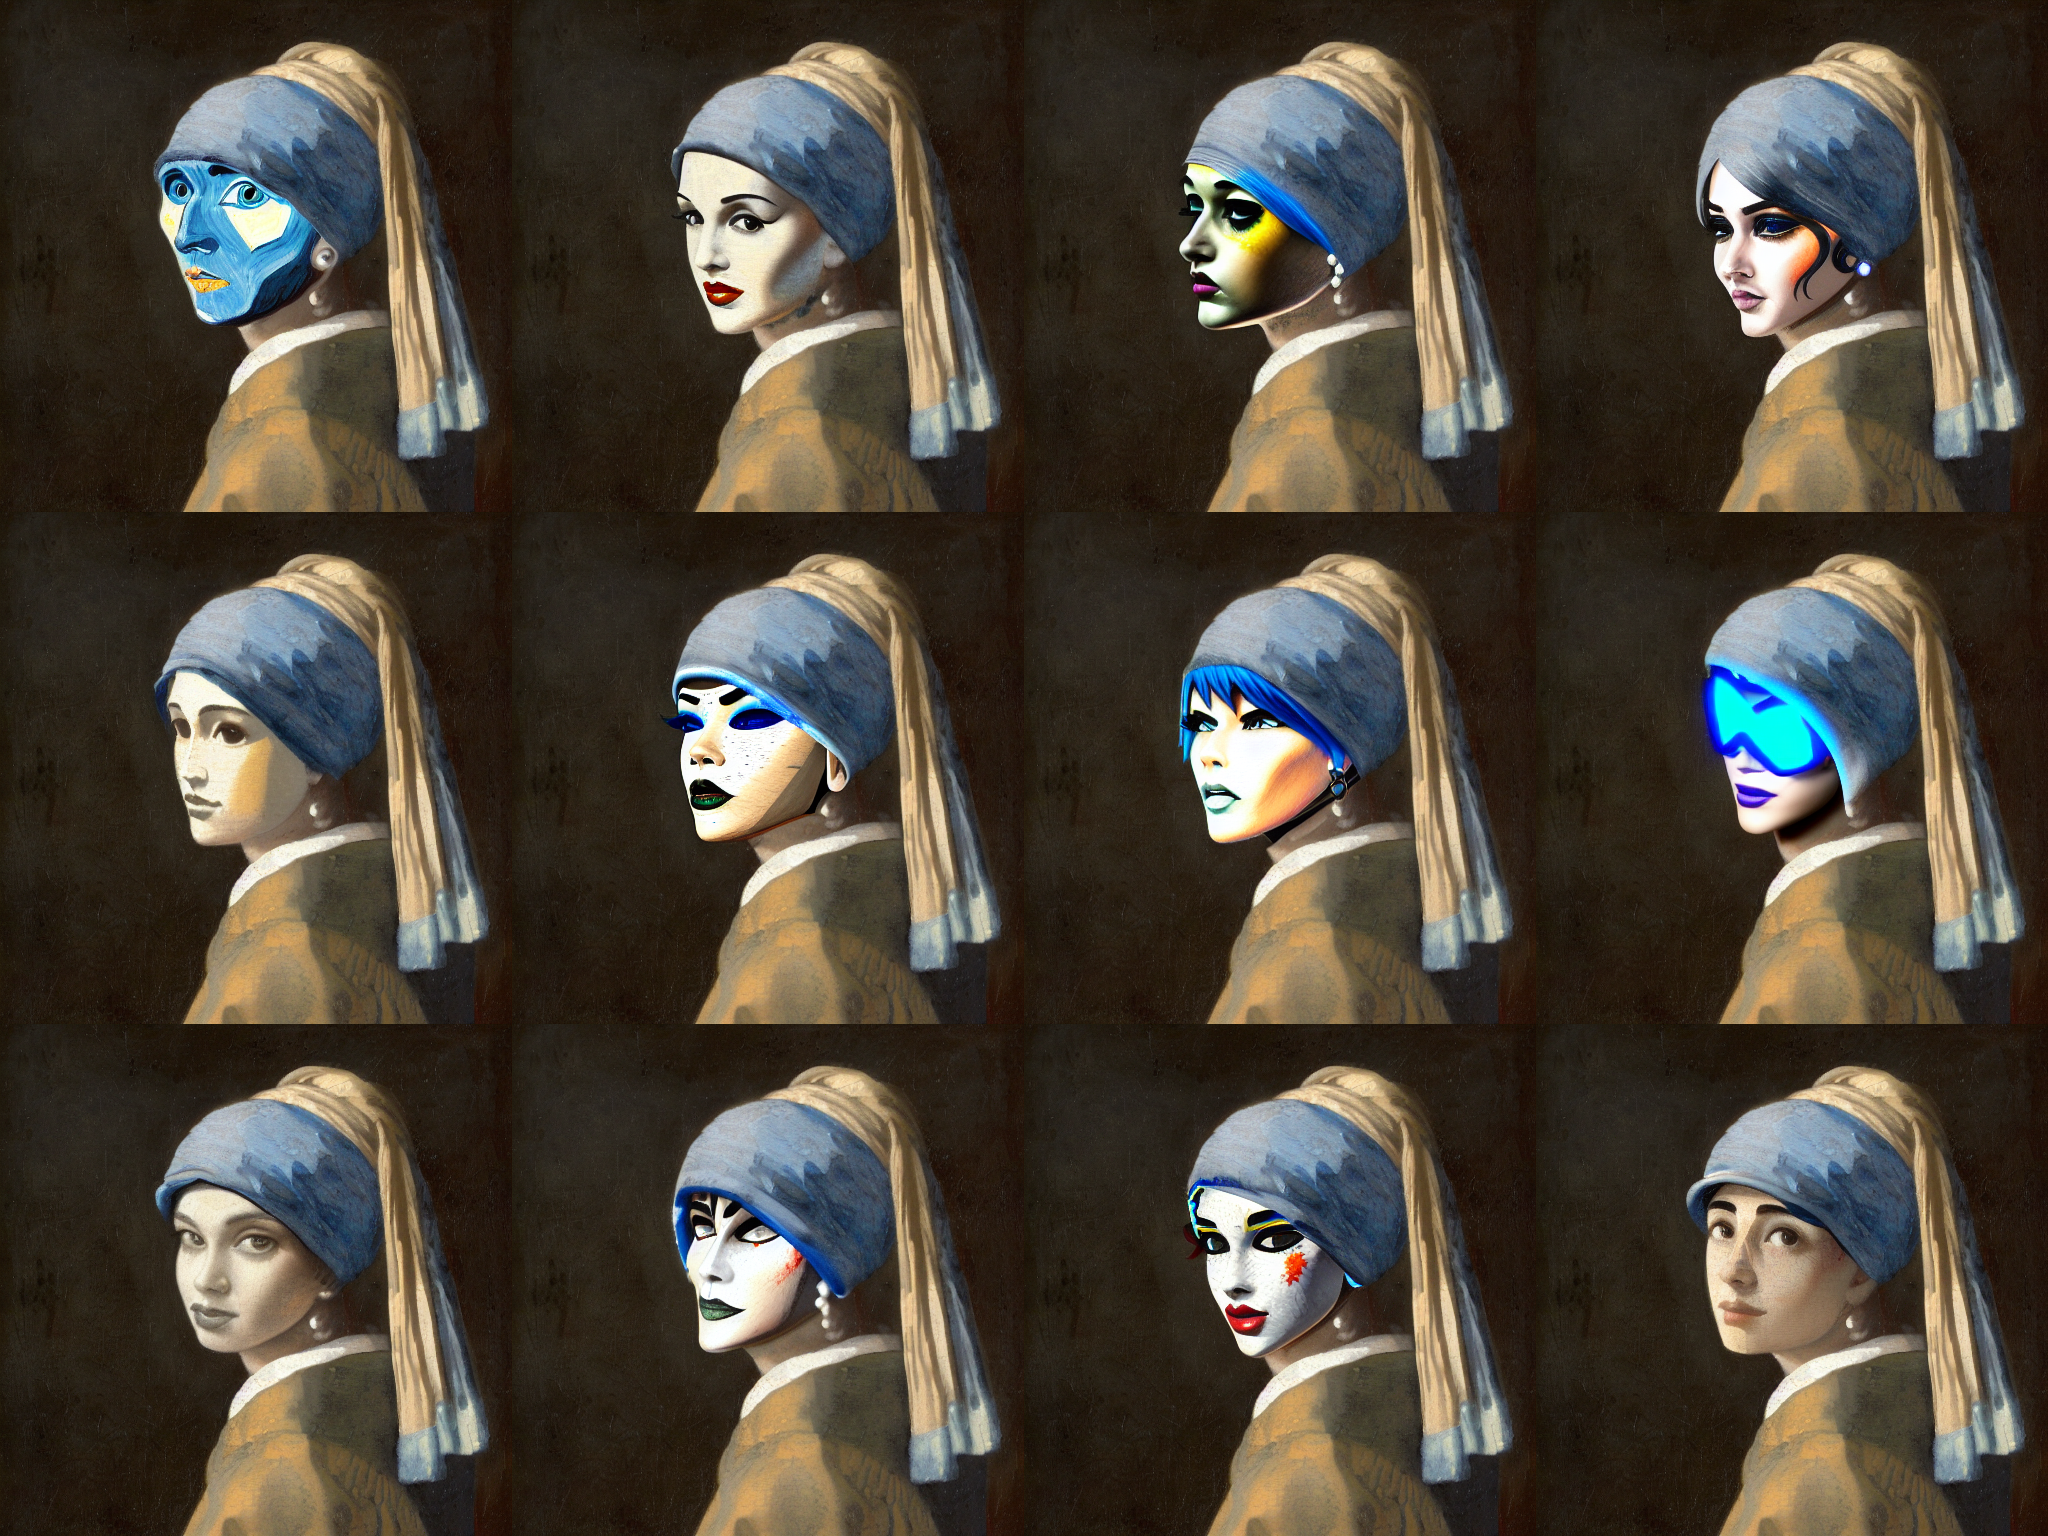

In [52]:
from lora_diffusion import image_grid

imgs = image_grid(outs, 3, 4)
imgs.save("../contents/lora_pti_inpainting_example.jpg")
imgs